In [128]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

train = np.load('data/fashion_train.npy')
test = np.load('data/fashion_test.npy')

x_train, y_train = np.hsplit(train, [-1])
x_test, y_test = np.hsplit(test, [-1])

scaler = StandardScaler()
scaler.fit(x_train)

X_scaled = scaler.transform(x_train)

# Perform PCA
pca = PCA(n_components=15)
X_train_reduced = pca.fit_transform(X_scaled)

X_scaled = scaler.transform(x_test)

# Perform PCA

X_reduced = pca.transform(X_scaled)


In [129]:
clf = DecisionTreeClassifier(max_depth = 4, random_state = 20)

clf.fit(X_train_reduced, y_train)

DecisionTreeClassifier(max_depth=4, random_state=20)

0.7174


Text(0.5, 15.0, 'Predicted label')

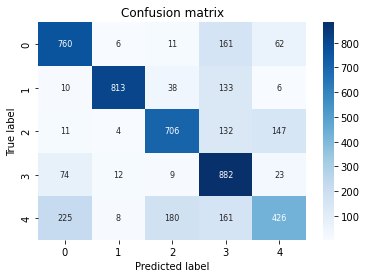

In [130]:
y_pred = clf.predict(X_reduced)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', annot_kws={"size": 8})
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [132]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, auc, roc_auc_score, roc_curve

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1: ", f1_score(y_test, y_pred, average='macro'))


Accuracy:  0.7174
Precision:  0.7315945154400908
Recall:  0.7174
F1:  0.7131684789449075
